In [1]:
#Die ganzen packages die für den versuch verwendet werden

import numpy as np #numpy ist ein package mit allen mathematischen ausdrücken/funktionen/operationen/etc. 
from uncertainties import ufloat #Uncertainties ist für das automatische berrechnen von unsicherheiten
from uncertainties.umath import * #Importieren von rechnen mit uncertainties (addition/multiplikation/etc.)
from uncertainties import unumpy as unp #kann arrays von unsicherheiten verstehen (also eine liste, statt jede zahl einzeln einzutippen)
from IPython.display import Latex, HTML, Math, display # Um ergebnisse schöner anzuzeigen. display() "ersetzt" quasi print(), und lässt latex fromatierung zu
import matplotlib.pyplot as plt #Damit kann man graphen plotten


#funktion für mittwlert mit fehler defnieren (um später ein uarray mit unsicherheiten direkt zu einem mittelwert zu machen)
def mean(values):
    nom = unp.nominal_values(values)
    std_mean = np.std(nom, ddof=1) / np.sqrt(len(nom))
    return ufloat(np.mean(nom), std_mean)


unsicherheit = 1 #mm?   #Ich nehme mal an das die gemessene unsicherheit immer gleich bleibt, also brauchen wir die nur einmal

# Eigenschaften von Flüssigkeiten

Es wird die Viskosität von Wasser bei verschiedenen Temperaturen ermittelt

## Bestimmung der Viskosität nach Hagen-Poiseuille

### Grundlagen

Die Viskösität ist die Innere Reibung von Flüssigkeiten und von der Substanz, dem Druck und der Temperatur ab. Dabei lässt sich die Durchflussrat $\frac{\Delta V}{\Delta t}$ (Änderung des Volumens V über die Zeit änderung t) durch die Hagen-Poiseuille Gleichung mittels Viskosität $\eta$ ermitteln:

$$\frac{\Delta V}{\Delta t} = \frac{\pi r^4 \Delta p}{8 \eta l}$$

wobei $\Delta p$ die Druckdifferenz/abfall ist, r der radius einer Röhre und l dessen Länge.

### Kapillarviskosimeter nach Hagen-Posieuille

Dieser aufbau wird mittels dem Schwere Druck (Hydrostatischen Druck) einer Wassersäule in einer Senkrecht stehenden Röhre gekennzeichnet. Dadurch ergibt sich für den Druckabfall lediglich der ausdruck

$$\Delta p = \rho g h$$

wobei $\rho$ die Flüssigkeitsdichte, g die Gravitationsbeschleunigung und h die höhe der Wassersäule ist.

Für den versuch wird der Druckabfall anhand $\bar{h}=(h_1+h_2)/2$ bestimmt, wobei $h_1$ die erste höhe und $h_2$ die zweite höhe der sinkendend Wassersäule ist. Mittels Gerätekonstante, welche am Viskosimeter angegeben wird, ergibt sich aus der Hagen-Poiseuille Gleichung für die Viskosität

\begin{gather}
\eta = a \cdot \rho \cdot \bar{h} \cdot \Delta t
\end{gather}


### Dichtebestimmung durch Aräometer

Die dichte der zu beobachten flüssigkeit wird durch ein Aräometer bestimmt, welches auf dem Archimedischen Prinzip beruht.

## Durchführung und Versuchsaufbau

Zuerst wird die Dichte von Destilliertem Wasser mittels Aräometer bestimmt. Dabei wird ein hoher messbecher verwendet und die Temperatur des Wassers mittel Digitalthermometer (unsicherheit irgendwo ablesen) gemessen.
In folge werden durch das Kapillarviskosimeter bei Raumtemperatur (Kann man messen wenn man ein schwitzer ist) 10 mal zu beginn jeder messung die Höhen $h_1$ und $h_2$ der Wassersäule gemessen. Danach wird das Ventil geöffnet und mittels einer Stoppuhr die zeit aufgenommen, welche die Säule zum absinken auf $h_1$ benötigt. Mittels der Dichte, der Höhen und der vergangenen Zeit lässt sich nun aus Gl.1 die Viskosität bestimmen.

Noch bissl mehr flavour text zu temperatur abhängigkeit




## Ergebnisse


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

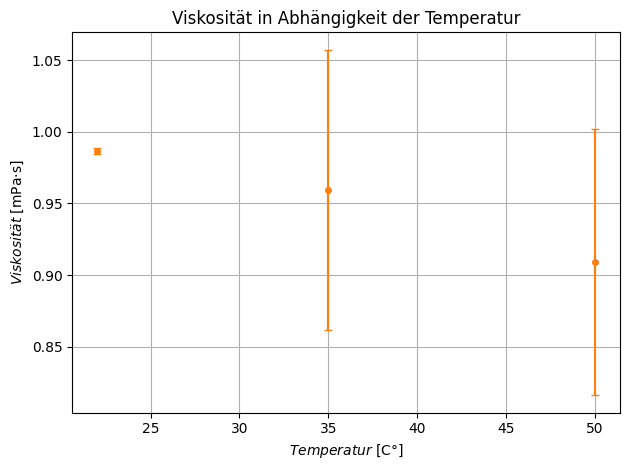

In [2]:


unsicherheit_dichte = 0.1       #g/cm^3  
#Liste von 10 messwerten [0.9975, ....] mit der unsicherheit von jedem wert unsicherheit_dichte
dichte_werte = ufloat(0.997, unsicherheit_dichte) #weiß nicht welche einheit
dichte = dichte_werte * 1000    #g/cm^3 --> kg/m^3

unsicherheit_höhe = 0.1             #cm
h_1 = ufloat(21, unsicherheit_höhe) #cm
h_2 = ufloat(15, unsicherheit_höhe) #cm

h = ((h_1+h_2)/2) /100 #cm #/1000 wegen cm-->m

unsicherheit_uhr = 0.2 #s --> 200ms sind menschliche Reaktionszeit
time = unp.uarray([11.8 , 11.7 , 11.6 , 11.7 , 11.7 , 11.8 , 11.6 , 11.8 , 11.6 , 11.7], unsicherheit_uhr) #s

a = 4.7*(10**(-7)) #Source: Emmilia Frei #hab von einheit auch keine ahnung

visko_raum = a * time * h * dichte *1000 #Pa --> mPa


display(Latex(rf"$$\bar{{\eta}}={mean(visko_raum):0f}~\mathrm{{mPa}}$$"))

#Temperaturabhängigkeit

#bei ~50 grad
unsicherheit_höhe = 0.1                #cm
h_1_50 = ufloat(21, unsicherheit_höhe) #cm
h_2_50 = ufloat(19, unsicherheit_höhe) #cm

h_50 = ((h_1_50+h_2_50)/2) /100 #cm --> m

unsicherheit_uhr = 0.2 #s
t_50 = ufloat(9.7, unsicherheit_uhr) #s

a = 4.7*(10**(-7)) #Source: Emmilia Frei #hab von einheit auch keine ahnung

visko_50 = a * t_50 * h_50 * dichte *1000 #Pa --> mPa

display(Latex(rf"$$\eta_{{50}}={visko_50:2f}~\mathrm{{mPa}}$$"))

#bei ~35 grad
unsicherheit_höhe = 0.1                #cm
h_1_30 = ufloat(20, unsicherheit_höhe) #cm
h_2_30 = ufloat(19, unsicherheit_höhe) #cm

h_30 = ((h_1_30+h_2_30)/2) / 100 #cm --> m 

unsicherheit_uhr = 0.2 #s
t_30 = ufloat(10.5, unsicherheit_uhr) #s

a = 4.7*(10**(-7)) #Source: Emmilia Frei #hab von einheit auch keine ahnung

visko_30 = a * t_30 * h_30 * dichte *1000 #Pa --> mPa


display(Latex(rf"$$\eta_{{35}}={visko_30:2f}~\mathrm{{mPa}}$$"))

#Graph

T = list([22, 35, 50])
V = unp.nominal_values(list([mean(visko_raum) ,visko_30, visko_50]))        #Die Tatsächlichen Werte
V_std = unp.std_devs(list([mean(visko_raum) ,visko_30, visko_50]))          #Die unsicherheiten der jeweiligen werte (std - standard deviation)

plt.plot(T, V, 'o', markersize=3) #T = x-achse, V = y-achse, 'o' als punkte darstellen (z.b. '-' für liniendarstellung, markersize is punktgröße)
plt.xlabel("$Temperatur$ [C°]")
plt.ylabel(r"$Viskosität$ [mPa$\cdot$s]")
plt.title("Viskosität in Abhängigkeit der Temperatur")
plt.errorbar(T, V, fmt='o',yerr=V_std, capsize=3, markersize=4,label="Messdaten")
#plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()


### Diskussion

Euer Flavour Text

## Oberflächenspannung nach der Abreißmethode

Es wird die Oberflächenspannung von Wasser ermittelt

### Grundlagen

Flavour text

### Durchführung und Aufbau

mehr Flavour text

### Ergebnisse

In [3]:
#Abreißmethode / oberflächenspannung von wasser


unsicherheit_kraft = 1      #mN
#Kraft Messungen:
F_werte = unp.uarray([82,81,82,82,81,82,82,80,82,81], unsicherheit_kraft)     #mN
#Mittelwert mit unsicherheit:
F = mean(F_werte)      #mN --> N

#Ring durchmesser
D = ufloat(200, 1) / 1000      #mm --> m

sigma = F/(2*np.pi*D)

display(Latex(rf"$$\bar{{F}}=({F:2f})~\mathrm{{mN}}$$"))
display(Latex(rf"$$\sigma=({sigma:2f})~\mathrm{{\frac{{mN}}{{m}}}}$$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Diskussion

Der Literaturwert für die Oberflächenspannung von Wasser bei 20°C liegt bei 72.75 mN/m (https://www.chemie.de/lexikon/Oberfl%C3%A4chenspannung.html#Werte_der_Oberfl.C3.A4chenspannung, 09.10.2025)  